## Campo eléctrico 
1. Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio 
elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:

- a. Encontrar el campo en un punto producido por dos cargas q1 y q2
- b. Emplee el comando  plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.
- c. Generalice el problema para varios puntos en el espacio.

Se recomienda emplear numpy array. 




In [6]:
import numpy as np
import matplotlib.pyplot as plt

def E_campo(q, r ):
  """
  Magnitud del campo electrico
  """
  k=1
  if r !=0:
    return k*q/r**2
  else:
    pass

def Campo_fuente(rsource, rp,q) : 
  """
  Parameter
  ---------
  rsource: numpy array de 2D, con la posicion de la fuente
  rp     : numpy array de 2D, El punto donde se encontrará el campo
  q      : magnitud de la carga en cuestión

  Return
  ----------
  2-tupla con:
  Ex: Componente x del campo electrico
  Ey: Componente y del campo electrico 
  """

  Delta_R =  rp - rsource
  MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
  
  if MagDelta_R != 0:
    u_R = Delta_R/MagDelta_R
  
    E = E_campo(q,MagDelta_R ) * u_R
    Ex = E[0]
    Ey = E[1]
  
    return Ex, Ey
  else:
    pass


#Ingresar un array con magnitud y posición de cada carga
n=int(input('Cantidad de cargas:'))
#src=np.zeros((n,3))
src=np.array([[ 1.,1.,1.], [-2.,-1.,-1.],[1.,-1.,3.]])
# for j in range(0,n):
#   k=0
#   for i in ['Magnitud','Pos. X','Pos. Y']:
#     var=input('{}:\n'.format(i))
#     src[j][k]=var
#     k=k+1
#   print('\n')

# Definir los puntos donde se se determinara el campo electrico 
x  = np.arange(min(src[:,1])-1,max(src[:,1])+1,0.25)#(-2, 3, 0.25)
n1 = len(x)
y  = np.arange(min(src[:,2])-1,max(src[:,2])+1,0.25)
n2 = len(y)

#Generar un conjunto de puntos para determinar el campo
rp = np.zeros((n1*n2 , 2))
k = 0
for x_ in (x):
  for y_ in (y):
    rp[k] = np.array([x_, y_])
    k=k+1   


#Generar un arreglo vacío donde estarán los valores de campo de cada carga
Eq=np.zeros((n,n1*n2,2))

#Asignar una 2-tupla a cada punto dentro de Eq para cada carga
for i in range(0, n): #iteración por cargas
  for j in range(0, len(rp)): #Iteración por puntos
    Eq[i][j] = Campo_fuente(src[i][1:], rp[j], src[i][0])

#Sumar los Eq[i] componente a componente
E=sum(Eq)

#Determinar color rojo para carga positiva o azul para negativa
color=[0]*n
for i in range(n):
  color[i]='ro' if src[i][0]>0 else 'bo'

plt.figure()
for i in range(n):
  plt.plot(src[i][1],src[i][2], color[i])
plt.quiver(rp[:,0], rp[:,1], E[:,0], E[:,1])
plt.show()

Cantidad de cargas: 


ValueError: invalid literal for int() with base 10: ''

## Movimiento parabólico.
2. Un jugador de baloncesto desea saber si encestará su tiro dependiendo de la velocidad inicial, ángulo de lanzamiento y posición respecto a la canasta. 

Elabore un programa en el que dada una distancia, velocidad inicial y  ángulo, determine si hay cesta. El modelo será bajo partícula, sin la rotación del balón. 

Se recomienda emplear numpy array. 

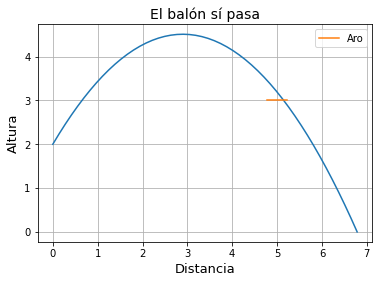

In [7]:
import numpy as np
import matplotlib.pyplot as plt

d=5
h=3
#Datos iniciales
y0=2
v0=8.1
th=60
th= th*np.pi/180   #ángulo
e=0.23            #radio del aro

vx=v0*np.cos(th)  #velocidad cte. en X

#Funciones que hallan las posiciones una respecto a la otra:
def jdex(x):
  j=y0+x*np.tan(th)-0.5*9.8*(x/(v0*np.cos(th)))**2
  return j
def idey(y):
  i=v0*np.cos(th)*(
  -v0*np.sin(th)-((v0*np.sin(th))**2+2*9.8*(y0-y))**0.5)/-9.8
  return i

#Distancia recorrida cuando la altura es h
#y cuando el balón toca el suelo
xh=idey(h)
xf=idey(0)

#Comprobar si el  balón está dentro del aro cuando alcanza la altura h
if np.abs(xh-d)<e:
  pasa='sí'
else:
  pasa='no'

#Generar la trayectria y graficar
x=np.linspace(0,xf,50)
y=jdex(x)


plt.figure()

plt.plot(x,y)
plt.plot((5-0.23,5.23),(3,3),label='Aro')
plt.grid()
plt.xlabel('Distancia', fontsize=13)
plt.ylabel('Altura',fontsize=13)
plt.legend(loc='best')
plt.title('El balón {} pasa'.format(pasa), fontsize=14)

plt.show()